In [1]:
# To access python data science libraries and visualise data and render plots in the Jupyter Notebook
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in the excel datasets and put into a panda dataframe
xls = pd.ExcelFile('KPMG_VI_New_raw_data_update_final_formatted.xlsx')
pd2 = pd.read_excel(xls, sheet_name=2, header=1)

In [3]:
df2 = pd.DataFrame(pd2)

In [4]:
# check out datatypes, columns name, counts
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [5]:
# check the first 5 records
df2.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [6]:
# check for null values
df2.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [7]:
# check that the customer id is unique
pd.Series(df2['customer_id']).is_unique

True

In [8]:
# check there are no duplicate properties
df2.duplicated(subset=['address', 'postcode'], keep='first').value_counts()

False    3999
dtype: int64

In [9]:
# show the frequency of different postcodes
df2['postcode'].value_counts()

2170    31
2155    30
2145    30
2153    29
2770    26
        ..
4552     1
4555     1
2485     1
3580     1
4421     1
Name: postcode, Length: 873, dtype: int64

In [10]:
# show the frequency of different states
df2['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [11]:
# replace all the misspelt or differently formatted data
df2['state'].replace({'New South Wales' : 'NSW', 'Victoria' : 'VIC'}, inplace=True)

In [12]:
# show the frequency of country to which the property belong to
df2['country'].value_counts()

Australia    3999
Name: country, dtype: int64

Text(0, 0.5, 'property valuation')

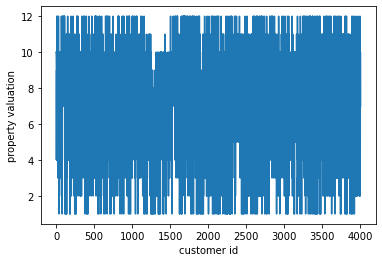

In [13]:
# visualise the valuation prices of properties
x = df2['customer_id']
y = df2['property_valuation']

plt.plot(x, y)
plt.xlabel('customer id')
plt.ylabel('property valuation')

In [14]:
# checking that the column names are in the correct format
df2.columns = map(str.lower, df2.columns)
df2.columns = map(str.strip, df2.columns)

In [15]:
df2

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7


In [16]:
#check the dataset after cleaning
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [17]:
#print to csv file after the cleaning
df2.to_csv('./data2_cleaned.csv',index=False)